In [15]:
from numpy import *
from scipy import misc
from scipy.stats import norm
import matplotlib.pyplot as plt
import math
from sklearn.feature_extraction import image
import time
from patchmatch_code import *

# This function builds an image of patches. Given an image im_in, an
# index idx characterizing a pixel position in im_in, a vector of
# offsets for that pixel and the set of patches extracted from im_in,
# the output represents the subset of patches given by idx + offsets[i], i=0...len(offsets)
def patch_cloud(im_in, idx, offsets, w, patches):
    [M, N] = im_in.shape
    m = 2*w+1
    im2 = zeros(im_in.shape, dtype = float)
    [i0, j0] = idx1d_to_idx2d(int(idx), M-2*w, N-2*w)
    im2[i0: i0+m, j0: j0+m] = patches[idx]
    for of in offsets:
        idx1 = int(idx + of)
        [i1, j1] = idx1d_to_idx2d(idx1, M-2*w, N-2*w)
        im2[i1: i1+m, j1: j1+m] = patches[idx1]
    return im2

t0 = time.time()

im_name = 'koala.png'
im = misc.imread(im_name, 'L')
im = 255.*im/im.max()
#crop image to work with a smaller one
i0 = 300
j0 = 400
w_im = 100
im = im[i0-w_im:i0+w_im+1, j0-w_im:j0+w_im+1]
[M, N] = im.shape
n = M*N

####################################################################
# FIND APPROXIMATED NEAREST NEIGHBOURS WITH GENERALIZED PATCHMATCH #
####################################################################
w_patch=2
m_patch = 2*w_patch+1 # side of a patch; a patch is then m_patch x m_patch
knn = 5 # Number of nearest neighbours
t0 = time.time()
offsets, weights = patch_match(im, m_patch, knn)
t1 = time.time()
delta_t = t1-t0
print("Execution took " + str(delta_t) + " s. \n")

/Users/yamadatakahito/.pyenv/versions/3.6.4/lib/python3.6/site-packages/ipykernel_launcher.py:29: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


Starting PatchMatch

Exctracting patches...
0.04045915603637695 s.

Init.  offsets...
0.0033991336822509766 s.

Init. weights...
1.3199880123138428 s.

Init. max-heaps...
0.1792597770690918 s.

First propagation...
3.087409019470215 s.

Random search...
13.242440938949585 s.

Second propagation...
2.5747392177581787 s.

Convert heaps to offsets and weights...
0.08785200119018555 s.

Execution took 20.550039052963257 s. 



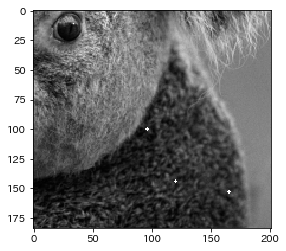

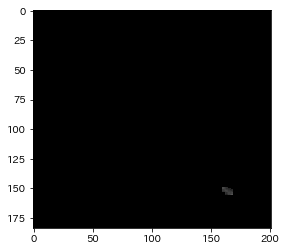

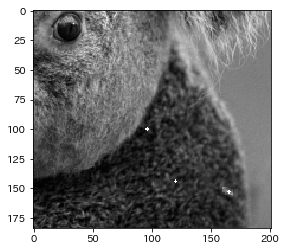

In [18]:
im_bis = pad(im, [w_patch, w_patch], 'symmetric')
patches = image.extract_patches_2d(im_bis.T, (m_patch, m_patch))
for i in range(0,n):
    patches[i]=patches[i].T

offsets = offsets.astype(int) # make sure offsets are integers

idx = int(floor((n-1)*random.rand())) # choose a pixel at random
[i0, j0] = idx1d_to_idx2d(int(idx), M, N)# compute 2D coordinates from pixel's index
offsets_for_pixel_idx = offsets[idx,] # Subset of offsets locating the knn approximated nearest neigbours
im_patches = patch_cloud(im_bis, idx, offsets_for_pixel_idx, w_patch, patches)# image showing the knn approximated nearest patches, including the reference patch
# cut off external w_patch wide stripes from im_patches to match the original image's size
[Mbis, Nbis] = im_patches.shape
im_patches = im_patches[w_patch:Mbis-w_patch, w_patch:Nbis-w_patch]

# Mark the reference pixel with a white cross
im[i0, j0] = 255
im[min(i0+1, M-1), j0] = 255
im[max(i0-1, 0), j0] = 255
im[i0, min(j0+1, N-1)] = 255
im[i0, max(j0-1, 0)] = 255

plt.close('all')
plt.figure()
plt.imshow(im, cmap='gray', vmin = 0, vmax = 255)
plt.figure()
plt.imshow(im_patches, cmap='gray', vmin = 0, vmax = 255)
plt.show()
plt.imshow(im_patches+im, cmap='gray', vmin = 0, vmax = 255)
plt.show()

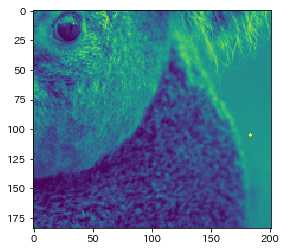

In [4]:
plt.imshow(im)

/Users/yamadatakahito/.pyenv/versions/3.6.4/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


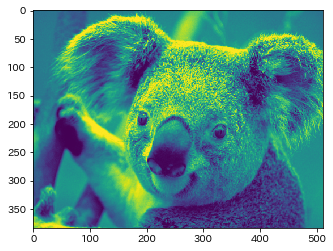

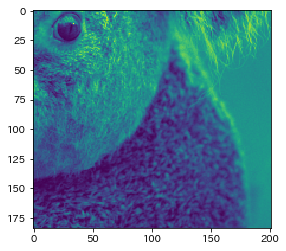

In [7]:
im_name = 'koala.png'
im = misc.imread(im_name, 'L')
im = 255.*im/im.max()
plt.imshow(im)
plt.show()
#crop image to work with a smaller one
i0 = 300
j0 = 400
w_im = 100
im = im[i0-w_im:i0+w_im+1, j0-w_im:j0+w_im+1]
plt.imshow(im)